In [42]:
import time
import math
import networkx as nx
import matplotlib.pyplot as plt

def log_factorial(N):
    if N == 0 or N == 1:
        return 0  # Базовый случай
    else:
        return math.log(N) + log_factorial(N - 1)

# Замер времени выполнения
def measure_time_log_factorial():
    sizes = [10, 20, 30, 40, 50, 100]
    results = []

    for N in sizes:
        total_time = 0
        iterations = 100

        for _ in range(iterations):
            start_time = time.time()
            log_factorial(N)
            total_time += time.time() - start_time

        avg_time = total_time / iterations
        avg_time = round(avg_time, 7)
        results.append((N, avg_time))

    return results

# Запуск замеров
execution_results_log = measure_time_log_factorial()
print("Среднее время выполнения log(N!):", execution_results_log)


Среднее время выполнения log(N!): [(10, 0.0), (20, 0.0), (30, 1e-05), (40, 0.0), (50, 1e-05), (100, 2e-05)]


In [43]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

    def __repr__(self):
        return f'Node({self.value})'

def reverse_list(head):
    if head is None or head.next is None:
        return head  # Базовый случай

    new_head = reverse_list(head.next)  
    head.next.next = head 
    head.next = None  

    return new_head  

def print_list(head):
    current = head
    while current:
        print(current.value, end=" -> ")
        current = current.next
    print("None")

# Создание списка
head = Node(3)
head.next = Node(2)
head.next.next = Node(0)
head.next.next.next = Node(-4)

print("Исходный список:")
print_list(head)

head = reverse_list(head)

print("Развернутый список:")
print_list(head)


Исходный список:
3 -> 2 -> 0 -> -4 -> None
Развернутый список:
-4 -> 0 -> 2 -> 3 -> None


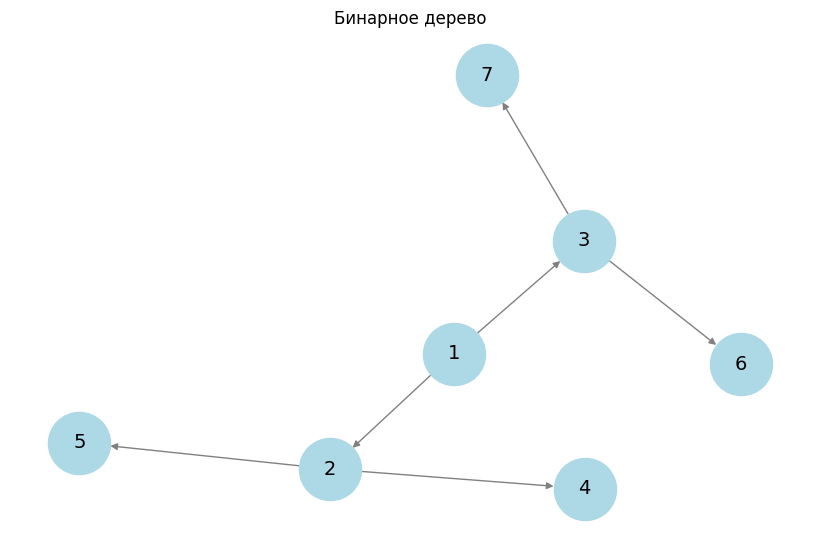

TypeError: list.append() takes exactly one argument (2 given)

In [44]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Функция для построения графа дерева
def build_graph(tree, graph=None, parent=None):
    if graph is None:
        graph = nx.DiGraph()

    if tree:
        graph.add_node(tree.value)
        
        if parent:
            graph.add_edge(parent.value, tree.value)
            
        build_graph(tree.left, graph, tree)
        build_graph(tree.right, graph, tree)
    return graph

#рисуем дуб
def draw_tree(tree, title="Бинарное дерево"):
    graph = build_graph(tree)
    pos = nx.spring_layout(graph)  
    plt.figure(figsize=(8, 5))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=14)
    plt.title(title)
    plt.show()

#пошаговая визуализация мудрого дуба

def visualize_traversal(tree, traversal_func, title):
    graph = build_graph(tree)
    pos = nx.spring_layout(graph)
    visited = []

    def traversal(node):
        if node:
            traversal_func(node, visited) 

    traversal(tree)


    for i, node in enumerate(visited):
        plt.figure(figsize=(8, 5))
        nx.draw(graph, pos, with_labels=True,
                node_color=['lightgreen' if n in visited[:i+1] else 'lightblue' for n in graph.nodes()],
                edge_color='gray', node_size=2000, font_size=14)
        plt.title(f"{title}: шаг {i+1}, посещена вершина {node}")
        plt.show()



# Preorder
def preorder(node, visited):
    if node:
        visited.append(node.value)
        preorder(node.left, visited)
        preorder(node.right, visited)
        

# Inorder
def inorder(node, visited):
    if node:
        inorder(node.left, visited)
        visited.append(node.value)
        inorder(node.right, visited)

# Postorder
def postorder(node, visited):
    if node:
        postorder(node.left, visited)
        postorder(node.right, visited)
        visited.append(node.value)


root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)


draw_tree(root)


visualize_traversal(root, preorder, "Preorder")
visualize_traversal(root, inorder, "Inorder")
visualize_traversal(root, postorder, "Postorder")

In [ ]:
print("Порядок прохождения нод Preorder:")
preorder_traversal(root)
print("\nПорядок прохождения нод Inorder:")
inorder_traversal(root)
print("\nПорядок прохождения нод Postorder:")
postorder_traversal(root)